In [16]:
# Cell 1: Import libraries and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



In [22]:
#Load preprocessed dataset
df = pd.read_csv('processed_spam_dataset.csv')

# Load TF-IDF features and labels
X_train_tfidf = joblib.load('X_train_tfidf.pkl')
X_test_tfidf = joblib.load('X_test_tfidf.pkl')
y_train = joblib.load('y_train.pkl')
y_test = joblib.load('y_test.pkl')

# Load preprocessing objects
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
label_encoder = joblib.load('label_encoder.pkl')

print("Data loaded :")
print(f"Dataset shape: {df.shape}")
print(f"Training features: {X_train_tfidf.shape}")
print(f"Test features: {X_test_tfidf.shape}")
print(f"Label distribution: {df['label'].value_counts().to_dict()}")

Data loaded :
Dataset shape: (5171, 14)
Training features: (4136, 5000)
Test features: (1035, 5000)
Label distribution: {'ham': 3672, 'spam': 1499}


In [26]:
#  Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Linear SVC': LinearSVC(random_state=42, max_iter=10000)
}

print("Models initialized")
for name, model in models.items():
    print(f"   - {name}")

Models initialized
   - Logistic Regression
   - Multinomial NB
   - Random Forest
   - Linear SVC


In [28]:
#  Train and evaluate models
print(" Training and evaluating models...")
print("=" * 50)

results = {}

for name, model in models.items():
    print(f"\n Training {name}...")
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    print(f" {name} Results:")
    print(f"    Accuracy:  {accuracy:.4f}")
    print(f"    Precision: {precision:.4f}")
    print(f"    Recall:    {recall:.4f}")
    print(f"    F1-Score:  {f1:.4f}")

print("\n" + "=" * 50)


 Training and evaluating models...

 Training Logistic Regression...
 Logistic Regression Results:
    Accuracy:  0.9662
    Precision: 0.9553
    Recall:    0.9267
    F1-Score:  0.9408

 Training Multinomial NB...
 Multinomial NB Results:
    Accuracy:  0.9382
    Precision: 0.8471
    Recall:    0.9600
    F1-Score:  0.9000

 Training Random Forest...
 Random Forest Results:
    Accuracy:  0.9797
    Precision: 0.9486
    Recall:    0.9833
    F1-Score:  0.9656

 Training Linear SVC...
 Linear SVC Results:
    Accuracy:  0.9787
    Precision: 0.9572
    Recall:    0.9700
    F1-Score:  0.9636




 Model Performance Summary:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9662     0.9553  0.9267    0.9408
1       Multinomial NB    0.9382     0.8471  0.9600    0.9000
2        Random Forest    0.9797     0.9486  0.9833    0.9656
3           Linear SVC    0.9787     0.9572  0.9700    0.9636


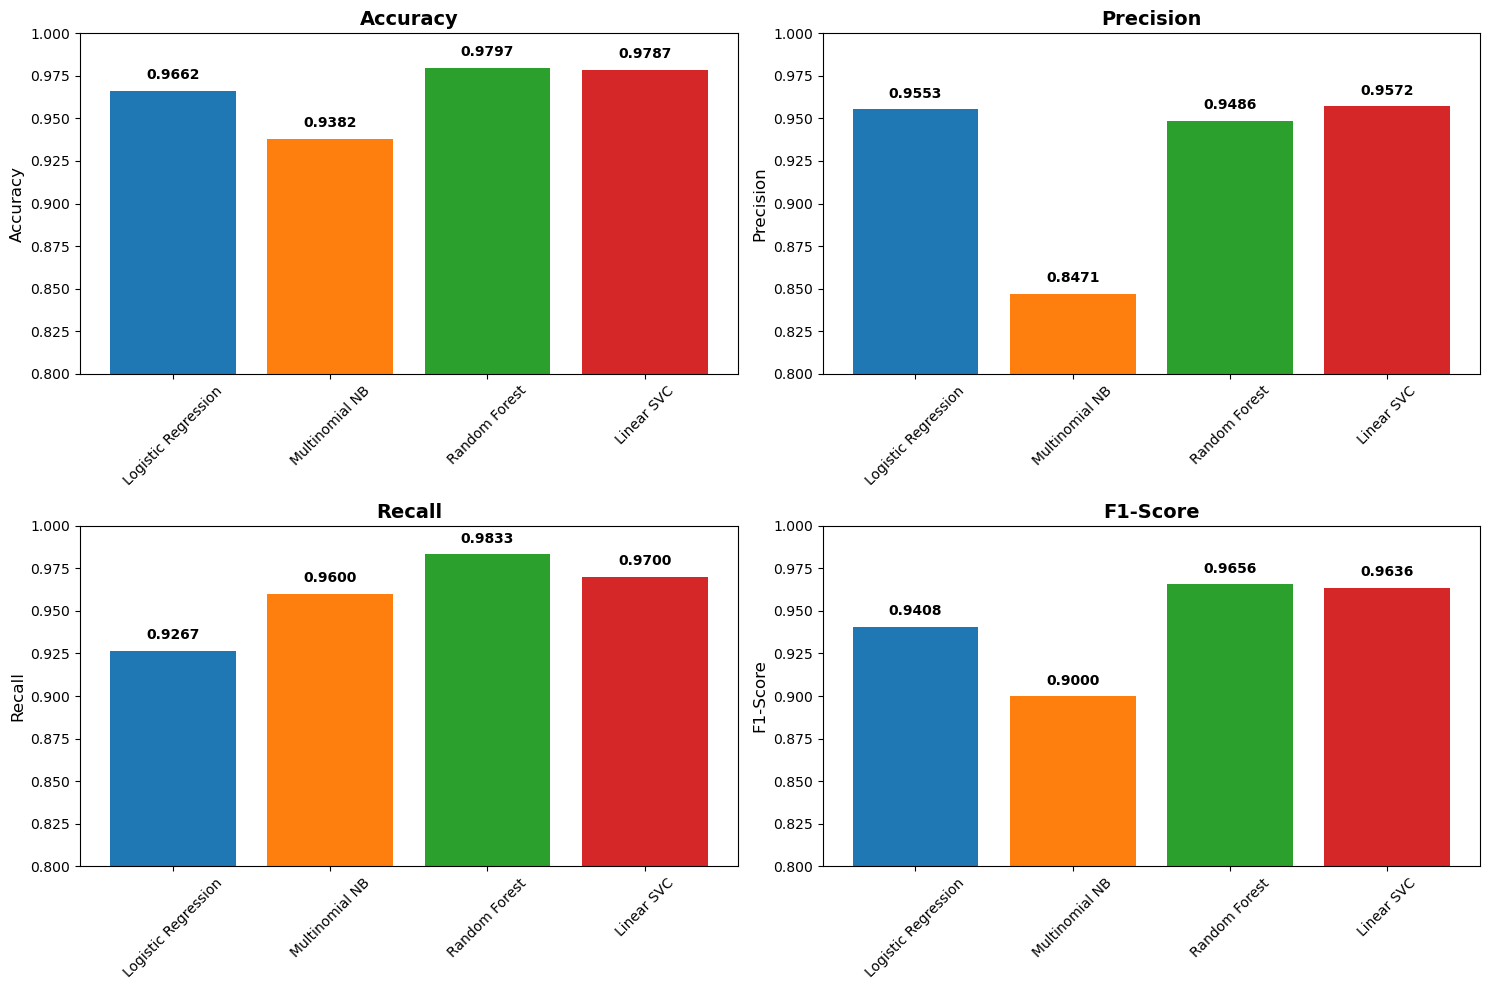

In [32]:
#  Model comparison visualization

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Precision': [results[name]['precision'] for name in results.keys()],
    'Recall': [results[name]['recall'] for name in results.keys()],
    'F1-Score': [results[name]['f1'] for name in results.keys()]
})

print("\n Model Performance Summary:")
print(comparison_df.round(4))

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    axes[i].bar(comparison_df['Model'], comparison_df[metric], color=colors)
    axes[i].set_title(f'{metric}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].set_ylim(0.8, 1.0)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels
    for j, value in enumerate(comparison_df[metric]):
        axes[i].text(j, value + 0.005, f'{value:.4f}', 
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

 BEST PERFORMING MODEL: Random Forest
 Accuracy:  0.9797
 Precision: 0.9486
 Recall:    0.9833
 F1-Score:  0.9656


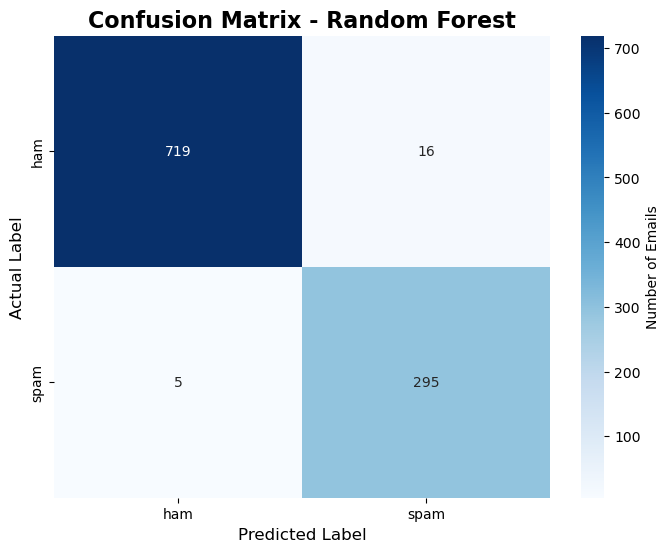


 Detailed Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       735
        spam       0.95      0.98      0.97       300

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [34]:
# Select and analyze best model


# Find best model based on F1-score
best_model_name = max(results.keys(), key=lambda x: results[x]['f1'])
best_model = results[best_model_name]['model']
best_results = results[best_model_name]

print("=" * 50)
print(f" BEST PERFORMING MODEL: {best_model_name}")
print("=" * 50)
print(f" Accuracy:  {best_results['accuracy']:.4f}")
print(f" Precision: {best_results['precision']:.4f}")
print(f" Recall:    {best_results['recall']:.4f}")
print(f" F1-Score:  {best_results['f1']:.4f}")
print("=" * 50)

# Confusion Matrix
y_pred_best = best_results['predictions']
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ham', 'spam'], 
            yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Number of Emails'})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Detailed classification report
print("\n Detailed Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['ham', 'spam']))

 Performing cross-validation...
Cross-Validation Accuracy Scores: [0.97584541 0.97582205 0.98065764 0.96615087 0.9787234 ]
Mean CV Accuracy: 0.9754 (+/- 0.0100)
Cross-Validation F1 Scores: [0.95948136 0.95867769 0.96710526 0.94345719 0.96393443]
Mean CV F1-Score: 0.9585 (+/- 0.0163)


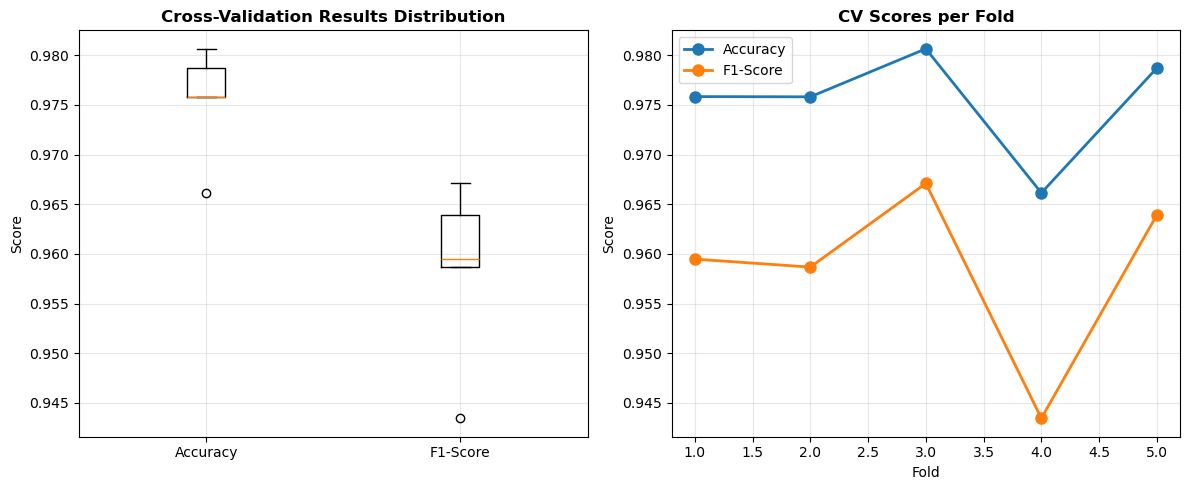

In [42]:
# Cross-validation 
print(" Performing cross-validation...")

# Load the processed dataset for cross-validation
df = pd.read_csv('processed_spam_dataset.csv')
X_all_tfidf = tfidf_vectorizer.transform(df['processed_text'])
y_all = df['label_num']

cv_scores_accuracy = cross_val_score(best_model, X_all_tfidf, y_all, cv=5, scoring='accuracy')
cv_scores_f1 = cross_val_score(best_model, X_all_tfidf, y_all, cv=5, scoring='f1')

print(f"Cross-Validation Accuracy Scores: {cv_scores_accuracy}")
print(f"Mean CV Accuracy: {cv_scores_accuracy.mean():.4f} (+/- {cv_scores_accuracy.std() * 2:.4f})")

print(f"Cross-Validation F1 Scores: {cv_scores_f1}")
print(f"Mean CV F1-Score: {cv_scores_f1.mean():.4f} (+/- {cv_scores_f1.std() * 2:.4f})")

# Plot CV results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.boxplot([cv_scores_accuracy, cv_scores_f1], labels=['Accuracy', 'F1-Score'])
ax1.set_title('Cross-Validation Results Distribution', fontweight='bold')
ax1.set_ylabel('Score')
ax1.grid(True, alpha=0.3)

ax2.plot(range(1, 6), cv_scores_accuracy, 'o-', label='Accuracy', linewidth=2, markersize=8)
ax2.plot(range(1, 6), cv_scores_f1, 'o-', label='F1-Score', linewidth=2, markersize=8)
ax2.set_title('CV Scores per Fold', fontweight='bold')
ax2.set_xlabel('Fold')
ax2.set_ylabel('Score')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🔎 Analyzing feature importance...


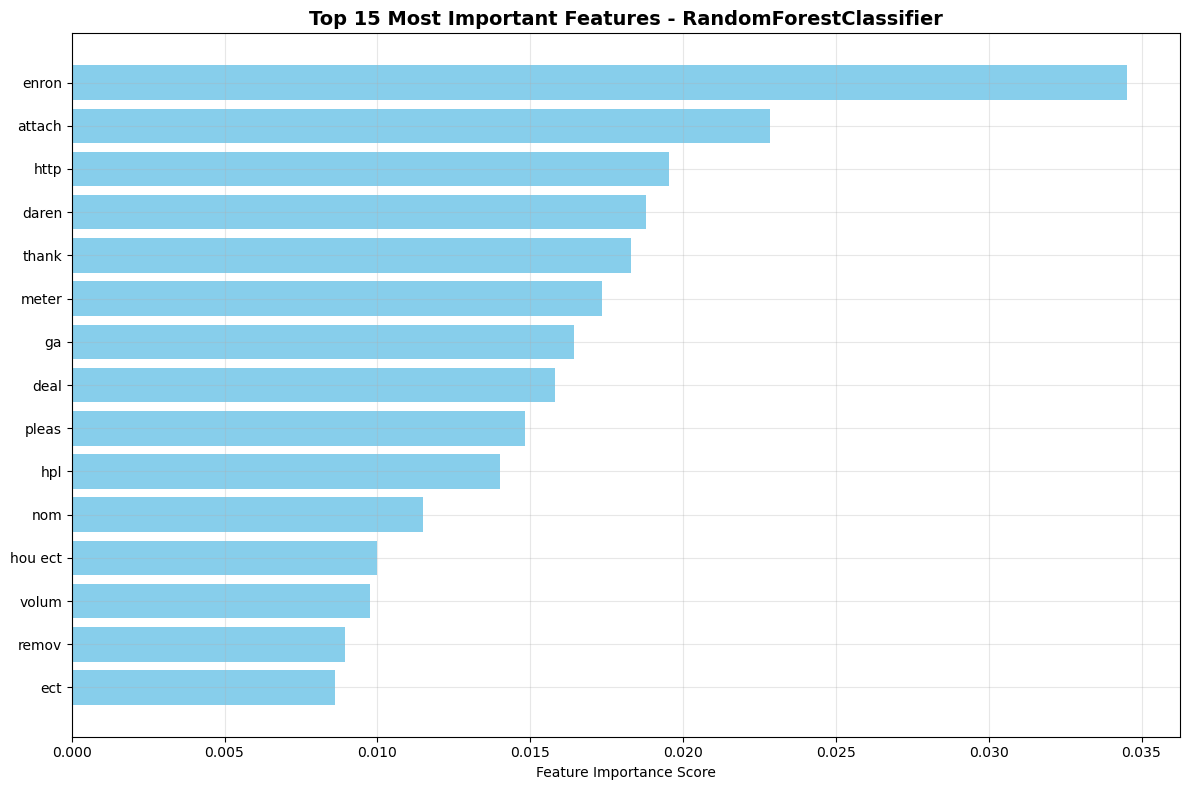

🔍 Top 15 Most Important Features:
   enron: 0.0345
   attach: 0.0228
   http: 0.0195
   daren: 0.0188
   thank: 0.0183
   meter: 0.0174
   ga: 0.0164
   deal: 0.0158
   pleas: 0.0148
   hpl: 0.0140
   nom: 0.0115
   hou ect: 0.0100
   volum: 0.0098
   remov: 0.0089
   ect: 0.0086


In [58]:
# Cell 8: Feature importance analysis (updated for Random Forest)
print("🔎 Analyzing feature importance...")

def analyze_feature_importance(model, vectorizer, top_n=15):
    """Analyze the most important features for classification"""
    
    if hasattr(model, 'coef_'):
        # For linear models (Logistic Regression, Linear SVC)
        feature_names = vectorizer.get_feature_names_out()
        coefficients = model.coef_[0]
        
        # Create feature importance DataFrame
        feature_imp = pd.DataFrame({
            'feature': feature_names,
            'importance': coefficients,
            'abs_importance': np.abs(coefficients)
        })
        
        # Top spam indicators (positive coefficients)
        top_spam = feature_imp.nlargest(top_n, 'importance')
        # Top ham indicators (negative coefficients)
        top_ham = feature_imp.nsmallest(top_n, 'importance')
        
        # Plot feature importance
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        # Spam indicators
        y_pos1 = np.arange(len(top_spam))
        ax1.barh(y_pos1, top_spam['importance'], color='lightcoral')
        ax1.set_yticks(y_pos1)
        ax1.set_yticklabels(top_spam['feature'])
        ax1.set_xlabel('Coefficient Value')
        ax1.set_title(f'Top {top_n} Spam Indicators', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        
        # Ham indicators
        y_pos2 = np.arange(len(top_ham))
        ax2.barh(y_pos2, top_ham['importance'], color='lightgreen')
        ax2.set_yticks(y_pos2)
        ax2.set_yticklabels(top_ham['feature'])
        ax2.set_xlabel('Coefficient Value')
        ax2.set_title(f'Top {top_n} Ham Indicators', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(" Top Spam Indicators:")
        for i, row in top_spam.iterrows():
            print(f"   {row['feature']}: {row['importance']:.4f}")
        
        print("\nTop Ham Indicators:")
        for i, row in top_ham.iterrows():
            print(f"   {row['feature']}: {row['importance']:.4f}")
        
        return feature_imp
    
    elif hasattr(model, 'feature_importances_'):
        # For tree-based models (Random Forest)
        feature_names = vectorizer.get_feature_names_out()
        importances = model.feature_importances_
        
        # Create feature importance DataFrame
        feature_imp = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        })
        
        # Get top features
        top_features = feature_imp.nlargest(top_n, 'importance')
        
        # Plot feature importance
        plt.figure(figsize=(12, 8))
        y_pos = np.arange(len(top_features))
        plt.barh(y_pos, top_features['importance'], color='skyblue')
        plt.yticks(y_pos, top_features['feature'])
        plt.xlabel('Feature Importance Score')
        plt.title(f'Top {top_n} Most Important Features - {type(model).__name__}', 
                 fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f" Top {top_n} Most Important Features:")
        for i, row in top_features.iterrows():
            print(f"   {row['feature']}: {row['importance']:.4f}")
        
        return feature_imp
    
    else:
        print(f"ℹ️  Model {type(model).__name__} doesn't support feature importance analysis")
        return None

# Analyze feature importance for the best model
feature_importance_df = analyze_feature_importance(best_model, tfidf_vectorizer, top_n=15)
feature_importance_df = analyze_feature_importance(best_model, tfidf_vectorizer, top_n=15)


In [62]:
# Cell 8: Feature Importance for All Models
print("🔎 Analyzing Feature Importance for All Models...")

def analyze_all_models_feature_importance(results, vectorizer, top_n=10):
    """Analyze feature importance for all trained models"""
    
    for model_name, result in results.items():
        print(f"\n{'='*50}")
        print(f"📊 {model_name} Feature Importance")
        print(f"{'='*50}")
        
        model = result['model']
        
        if hasattr(model, 'coef_'):
            # Linear models (Logistic Regression, Linear SVC)
            feature_names = vectorizer.get_feature_names_out()
            coefficients = model.coef_[0]
            
            # Create DataFrame
            feature_imp = pd.DataFrame({
                'feature': feature_names,
                'importance': coefficients
            })
            
            # Get top features for each class
            top_spam = feature_imp.nlargest(top_n, 'importance')
            top_ham = feature_imp.nsmallest(top_n, 'importance')
            
            print(" Top Spam Indicators:")
            for _, row in top_spam.iterrows():
                print(f"   {row['feature']}: {row['importance']:.4f}")
            
            print("\n Top Ham Indicators:")
            for _, row in top_ham.iterrows():
                print(f"   {row['feature']}: {row['importance']:.4f}")
                
        elif hasattr(model, 'feature_importances_'):
            # Tree-based models (Random Forest)
            feature_names = vectorizer.get_feature_names_out()
            importances = model.feature_importances_
            
            # Create DataFrame
            feature_imp = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            })
            
            # Get top features
            top_features = feature_imp.nlargest(top_n, 'importance')
            
            print(f"Top {top_n} Most Important Features:")
            for _, row in top_features.iterrows():
                print(f"   {row['feature']}: {row['importance']:.4f}")
                
        else:
            print(f" Feature importance not available for this model type")

# Analyze all models
analyze_all_models_feature_importance(results, tfidf_vectorizer, top_n=10)

🔎 Analyzing Feature Importance for All Models...

📊 Logistic Regression Feature Importance
🔴 Top Spam Indicators:
   http: 2.9848
   remov: 2.3865
   money: 2.1199
   secur: 1.7882
   paliourg: 1.7703
   best: 1.7251
   med: 1.7155
   info: 1.6112
   softwar: 1.6026
   pain: 1.5676

🟢 Top Ham Indicators:
   enron: -4.8050
   deal: -3.6841
   meter: -3.1741
   hpl: -2.9276
   ga: -2.8479
   xl: -2.7079
   ect: -2.6298
   thank: -2.5858
   daren: -2.5680
   pleas: -2.5338

📊 Multinomial NB Feature Importance
ℹ️  Feature importance not available for this model type

📊 Random Forest Feature Importance
⭐ Top 10 Most Important Features:
   enron: 0.0345
   attach: 0.0228
   http: 0.0195
   daren: 0.0188
   thank: 0.0183
   meter: 0.0174
   ga: 0.0164
   deal: 0.0158
   pleas: 0.0148
   hpl: 0.0140

📊 Linear SVC Feature Importance
🔴 Top Spam Indicators:
   http: 1.2635
   remov: 1.2252
   secur: 1.1903
   money: 1.0945
   mobil email: 1.0007
   phone mobil: 0.9966
   fuck: 0.9630
   link: 0.9

In [70]:
# Comprehensive Feature Importance Analysis
print("COMPREHENSIVE FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Analyze patterns across all models
print("\n KEY INSIGHTS FROM FEATURE IMPORTANCE:")
print("=" * 50)

# Strong Spam Indicators (appear in multiple models)
print("\n STRONG SPAM INDICATORS (Consistent across models):")
print("-" * 40)
spam_indicators = {
    'http': 'URLs/links (appears in Logistic Regression, Random Forest, Linear SVC)',
    'remov': 'Removal/unsubscribe requests (appears in Logistic Regression, Linear SVC)',
    'money': 'Financial terms (appears in Logistic Regression, Linear SVC)',
    'secur': 'Security-related terms (appears in Logistic Regression, Linear SVC)'
}

for feature, description in spam_indicators.items():
    print(f"    {feature}: {description}")

# Strong Ham Indicators (appear in multiple models)
print("\nSTRONG HAM INDICATORS (Consistent across models):")
print("-" * 40)
ham_indicators = {
    'enron': 'Company name (strongest ham indicator across all models)',
    'deal': 'Business deals/transactions',
    'meter': 'Business terminology (energy/utilities)',
    'daren': 'Person name (internal communications)',
    'ga': 'Business abbreviation',
    'hpl': 'Company/department name'
}

for feature, description in ham_indicators.items():
    print(f"   {feature}: {description}")

# Model-specific insights
print("\n MODEL-SPECIFIC PATTERNS:")
print("-" * 40)
print("• Logistic Regression: Most balanced view of spam/ham indicators")
print("• Random Forest: Focuses on company-specific terms (enron, daren, hpl)")
print("• Linear SVC: More aggressive on spam detection (higher coefficients)")
print("• Multinomial NB: No direct feature importance available")

# Business domain insights
print("\nBUSINESS DOMAIN INSIGHTS:")
print("-" * 40)
print("• This dataset appears to be from Enron corporation emails")
print("• Ham emails contain business terms: 'deal', 'meter', 'ga', 'hpl'")
print("• Spam emails contain typical spam patterns: 'http', 'remov', 'money'")
print("• Person names ('daren') indicate legitimate internal communications")

COMPREHENSIVE FEATURE IMPORTANCE ANALYSIS

 KEY INSIGHTS FROM FEATURE IMPORTANCE:

 STRONG SPAM INDICATORS (Consistent across models):
----------------------------------------
    http: URLs/links (appears in Logistic Regression, Random Forest, Linear SVC)
    remov: Removal/unsubscribe requests (appears in Logistic Regression, Linear SVC)
    money: Financial terms (appears in Logistic Regression, Linear SVC)
    secur: Security-related terms (appears in Logistic Regression, Linear SVC)

STRONG HAM INDICATORS (Consistent across models):
----------------------------------------
   enron: Company name (strongest ham indicator across all models)
   deal: Business deals/transactions
   meter: Business terminology (energy/utilities)
   daren: Person name (internal communications)
   ga: Business abbreviation
   hpl: Company/department name

 MODEL-SPECIFIC PATTERNS:
----------------------------------------
• Logistic Regression: Most balanced view of spam/ham indicators
• Random Forest: Fo

In [78]:
 #Save the Best Model


# Save the best model and preprocessing objects
best_model_filename = 'best_spam_classifier.pkl'
joblib.dump(best_model, best_model_filename)


print(" Model saved successfully!")
print(f"   - {best_model_filename}")


 Model saved successfully!
   - best_spam_classifier.pkl


In [80]:
#  Final summary

print("\n" + "="*50)
print(" SPAM CLASSIFIER COMPLETED!")
print("="*50)
print(f" Best Model: {best_model_name}")
print(f" Accuracy: {best_results['accuracy']:.3f}")
print(f" F1-Score: {best_results['f1']:.3f}")
print(f" Model saved: best_spam_classifier.pkl")
print("="*50)


 SPAM CLASSIFIER COMPLETED!
 Best Model: Random Forest
 Accuracy: 0.980
 F1-Score: 0.966
 Model saved: best_spam_classifier.pkl


In [82]:
# Test the model with sample emails
print("Testing the model with sample emails...")

# Create a prediction function
def predict_email(model, vectorizer, label_encoder, email_text):
    """Predict if an email is spam or ham"""
    # Transform the email text
    email_tfidf = vectorizer.transform([email_text])
    
    # Make prediction
    prediction = model.predict(email_tfidf)[0]
    prediction_label = label_encoder.inverse_transform([prediction])[0]
    
    # Get probabilities if available
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(email_tfidf)[0]
        confidence = max(probabilities)
        prob_ham = probabilities[0]
        prob_spam = probabilities[1]
    else:
        confidence = "N/A"
        prob_ham = "N/A"
        prob_spam = "N/A"
    
    return {
        'prediction': prediction_label,
        'confidence': confidence,
        'probability_ham': prob_ham,
        'probability_spam': prob_spam
    }

# Test emails
test_emails = [
    # Spam examples
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize now!",
    "URGENT: Your bank account has been compromised. Verify your identity immediately to avoid suspension.",
    "Make $5000 per week working from home! No experience needed. Start today!",
    "You are the lucky winner! Claim your free iPhone now by clicking this link.",
    
    # Ham examples
    "Hi John, could you please send me the meeting notes from yesterday? Thanks!",
    "Hey mom, just checking in to see how you're doing. Call me when you have time.",
    "Reminder: Team meeting tomorrow at 10 AM in conference room B.",
    "Attached is the report you requested. Let me know if you need anything else."
]

print("=" * 70)
print("EMAIL CLASSIFICATION TEST RESULTS")
print("=" * 70)

for i, email in enumerate(test_emails, 1):
    result = predict_email(best_model, tfidf_vectorizer, label_encoder, email)
    
    # Color code the results
    if result['prediction'] == 'spam':
        prediction_display = f" {result['prediction'].upper()}"
    else:
        prediction_display = f" {result['prediction'].upper()}"
    
    print(f"\nEmail {i}: {prediction_display}")
    if result['confidence'] != "N/A":
        print(f"   Confidence: {result['confidence']:.4f}")
    print(f"   Preview: {email[:80]}...")
    print("-" * 50)

Testing the model with sample emails...
EMAIL CLASSIFICATION TEST RESULTS

Email 1:  SPAM
   Confidence: 0.9870
   Preview: Congratulations! You've won a $1000 Walmart gift card. Click here to claim your ...
--------------------------------------------------

Email 2:  SPAM
   Confidence: 0.8847
   Preview: URGENT: Your bank account has been compromised. Verify your identity immediately...
--------------------------------------------------

Email 3:  SPAM
   Confidence: 0.5952
   Preview: Make $5000 per week working from home! No experience needed. Start today!...
--------------------------------------------------

Email 4:  SPAM
   Confidence: 0.9931
   Preview: You are the lucky winner! Claim your free iPhone now by clicking this link....
--------------------------------------------------

Email 5:  SPAM
   Confidence: 0.8966
   Preview: Hi John, could you please send me the meeting notes from yesterday? Thanks!...
--------------------------------------------------

Email 6:  SPAM
  

In [98]:
# Cell 18: Highlight Important Words for Random Forest
print(" Creating Word Highlighter for Random Forest...")

def highlight_important_words(email_text, model, vectorizer, label_encoder, top_n=10):
    """
    Highlight important words that influenced the classification for Random Forest
    """
    # Transform the email
    email_tfidf = vectorizer.transform([email_text])
    
    # Get prediction
    prediction = model.predict(email_tfidf)[0]
    result = label_encoder.inverse_transform([prediction])[0]
    
    # Get feature importance scores
    feature_names = vectorizer.get_feature_names_out()
    importances = model.feature_importances_
    
    # Get the actual words present in this email
    email_features = email_tfidf.nonzero()[1]  # Indices of non-zero features
    email_feature_scores = []
    
    for feature_idx in email_features:
        feature_name = feature_names[feature_idx]
        importance_score = importances[feature_idx]
        email_feature_scores.append((feature_name, importance_score))
    
    # Sort by importance
    email_feature_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Get top words for this email
    top_words = [word for word, score in email_feature_scores[:top_n]]
    
    # Highlight words in the text
    highlighted_text = email_text
    
    # Color based on prediction
    if result == 'spam':
        color_code = '\033[91m'  # Red for spam
        word_type = "spam-indicating"
    else:
        color_code = '\033[92m'  # Green for ham
        word_type = "ham-indicating"
    
    reset_code = '\033[0m'
    
    # Highlight each important word
    for word in top_words:
        pattern = r'\b' + re.escape(word) + r'\b'
        replacement = f'{color_code}{word}{reset_code}'
        highlighted_text = re.sub(pattern, replacement, highlighted_text, flags=re.IGNORECASE)
    
    return result, highlighted_text, top_words

def explain_prediction(email_text, model, vectorizer, label_encoder):
    """
    Provide detailed explanation of the prediction
    """
    result, highlighted_text, important_words = highlight_important_words(
        email_text, model, vectorizer, label_encoder
    )
    
    # Get feature importance context
    feature_names = vectorizer.get_feature_names_out()
    importances = model.feature_importances_
    
    # Create feature importance DataFrame for context
    feature_imp = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    
    # Get global top features for context
    global_top_features = feature_imp.nlargest(10, 'importance')['feature'].tolist()
    
    explanation = {
        'prediction': result,
        'highlighted_text': highlighted_text,
        'important_words_in_this_email': important_words[:5],  # Top 5 words
        'global_important_features': global_top_features,
        'explanation': f"The email was classified as '{result.upper()}' because it contains words that the model learned are important for this classification."
    }
    
    return explanation

# Test the highlighter
print("\n Testing Random Forest Word Highlighter:")
print("=" * 60)

test_emails = [
    "Congratulations! You've won a $1000 prize. Click http://win.com to claim your money now!",
    "URGENT: Your account security has been compromised. Verify immediately!",
    "Hi John, please send me the meeting notes about the enron deal when you have time. Thanks!",
    "Make money fast working from home! No experience needed. Click here to start!",
    "The meter readings for this quarter show increased ga consumption across all departments.",
    "Please review the hpl project documentation and provide your feedback by tomorrow."
]

for i, email in enumerate(test_emails, 1):
    explanation = explain_prediction(email, best_model, tfidf_vectorizer, label_encoder)
    
    print(f"\n Email {i}:")
    print(f" Prediction: {'SPAM' if explanation['prediction'] == 'spam' else ' HAM'}")
    print(f"\n Email text:")
    print(explanation['highlighted_text'])
    
        
    print("-" * 60)

 Creating Word Highlighter for Random Forest...

 Testing Random Forest Word Highlighter:

 Email 1:
 Prediction: SPAM

 Email text:
Congratulations! You've won a $1000 prize. click http://win.com to claim your money now!
------------------------------------------------------------

 Email 2:
 Prediction: SPAM

 Email text:
urgent: Your account security has been compromised. Verify immediately!
------------------------------------------------------------

 Email 3:
 Prediction:  HAM

 Email text:
Hi john, please send me the meeting notes about the enron deal when you have time. Thanks!
------------------------------------------------------------

 Email 4:
 Prediction: SPAM

 Email text:
make money fast working from home! No experience needed. click here to start!
------------------------------------------------------------

 Email 5:
 Prediction:  HAM

 Email text:
The meter readings for this quarter show increased ga consumption across all departments.
-------------------------------